In [1]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   
import seaborn as sns

sia = SentimentIntensityAnalyzer()

In [2]:
df = pd.read_csv('Reviews.csv')

In [3]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/568454 [00:00<?, ?it/s]

In [4]:
vaders = pd.DataFrame(res).T
vaders =  vaders.reset_index().rename(columns = {'index' : 'Id'})
vaders = vaders.merge(df, how ='left')
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [5]:

vaders['sentiment'] = vaders['pos'] - vaders['neg']

sorted_df = vaders.sort_values('sentiment',ascending = False)
pos_df = sorted_df[sorted_df['sentiment']>0.1]
neg_df = sorted_df[sorted_df['sentiment']<-0.1]
neu_df = sorted_df[sorted_df['sentiment']==0]

pos_df.to_csv('pos_reviews1.csv', index = False)
neu_df.to_csv('nue_reviews1.csv', index = False)
neg_df.to_csv('neg_reviews1.csv', index = False)
vaders.head()


,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,sentiment
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.305
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-0.138
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,0.064
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0.000
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0.448


In [6]:
hehe = pd.read_csv('pos_reviews1.csv')
hehe.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,sentiment
0,510859,0.000,0.036,0.964,0.9995,B004R6F88W,A6J8ESD5NBGZ,kees,0,0,5,1343606400,Yum,"Arrived quick, beautifully packaged and delici...",0.964
1,472334,0.000,0.116,0.884,0.9980,B00488N8KY,A37E7G74Y4U93F,CHARLES,0,0,5,1332374400,HONEST EARTH POTATOES,GREAT GREAT GREAT GREAT GREAT GREAT GREAT GREA...,0.884
2,257810,0.038,0.096,0.866,0.9953,B000J0NX8W,A1E6MMWRIJA6GD,Frank,1,1,5,1315526400,great low carb brownies,"excellent product, easy to make, tastes great,...",0.828
3,256425,0.000,0.207,0.793,0.9895,B0008IUUDQ,A20NS3L867EZX1,N. R. Forbes,2,4,5,1254787200,I Love love love love love love love love this...,Let me say it again. I Love love love love lov...,0.793
4,234393,0.000,0.209,0.791,0.8213,B000F4H5GI,A47ZTYZTX783J,Sheri L. Pritchard,0,2,5,1171152000,"Twinings Irish Breakfast Tea, Tea Bags, 20-Cou...",OUR FAVORITE! EXCELLENT ITEM!!,0.791


In [7]:


from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS
import sys, os
os.chdir(sys.path[0])




# Positive WordCloud

In [8]:
import pandas as pd

# Read CSV file into a pandas DataFrame
df = pd.read_csv('pos_reviews1.csv')

# Extract text from a specific column
pos_text1 = df['Text'].to_string(index=False)

# Save the text to a text file
with open('pos_text1.txt', 'w', encoding='utf-8') as file:
    file.write(pos_text1)



In [9]:
text = open('pos_text1.txt', mode = 'r', encoding = 'utf-8').read()
stopwords = set(stopwords.words('english'))

wc = WordCloud(
        background_color = 'white',
        stopwords= stopwords,
        height = 600,
        width = 400)

wc.generate(text)
wc.to_file('positive_feeback1.png')

# Negative WordCloud

In [10]:
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS
import sys, os
os.chdir(sys.path[0])

# Read CSV file into a pandas DataFrame
df2 = pd.read_csv('updated_neg.csv')

# Extract text from a specific column
neg_text1 = df2['Text'].to_string(index=False)

# Save the text to a text file
with open('neg_text1.txt', 'w', encoding='utf-8') as file:
    file.write(neg_text1)
    
    
text1 = open('neg_text1.txt', mode = 'r', encoding = 'utf-8').read()
stopwords = set(stopwords.words('english'))

wc = WordCloud(
        background_color = 'white',
        stopwords= stopwords,
        height = 600,
        width = 400)

wc.generate(text1)
wc.to_file('negative_feeback1.png')

In [11]:
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,sentiment
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.305
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-0.138
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,0.064
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0.000
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0.448


# Accuracy


In [15]:
from sklearn.metrics import accuracy_score

data = vaders


data["polarity_rating"] = data.apply(lambda row: "negative" if row["sentiment"] < -0.1 else "positive" if row["sentiment"]>0.1 else "neutral", axis = 1)

    
threshold = 2                              
data["score_rating"] = data["Score"].apply(lambda x: "positive" if x >= threshold else "negative") 

     
accuracy = accuracy_score(data["score_rating"], data["polarity_rating"])
print("Accuracy VADER ", accuracy)
                                     

Accuracy VADER  0.640655180542313


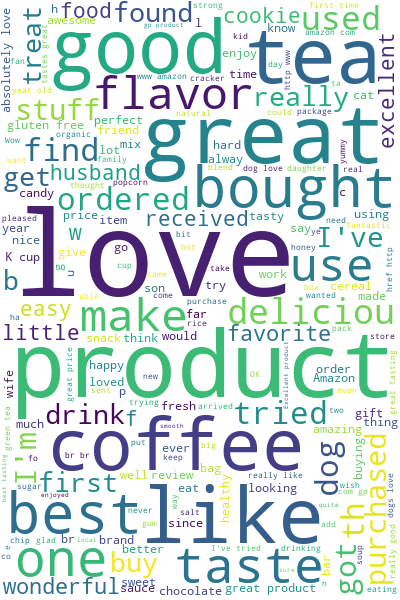

In [13]:
from IPython.display import Image
Image(filename = "updated_pos.png", width = 500, height =1000)


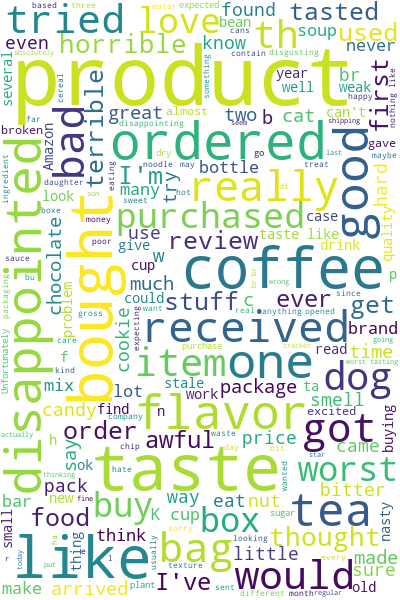

In [14]:
Image(filename = "updated_neg.png", width = 500, height =1000)

In [ ]:
from IPython.display import Image
Image(filename = "updated_pos.png", width = 500, height =1000)